# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

# Get the Data

In [2]:
df= pd.read_excel (r'storiesfinal.xlsx')

In [3]:
df.head()

,Link,Story
0,https://www.qssas.com/story/27985,['يُحكى أن رجلًا من الصالحين كان يعمل بتجارة ا...
1,https://www.qssas.com/story/27999,['صلة الرحم جزء مهم من تعاليم ديننا الحنيف ، ف...
2,https://www.qssas.com/story/27898,['أشرقت الشمس في الصباح ، وبدأت الطيور تغرد مث...
3,https://www.qssas.com/story/27971,['كان هنالك قرصان يسمى أبو عين كان قاسيًا وعني...
4,https://www.qssas.com/story/27784,['حيث الحصن الأخضر الذي يحيط بكوبنهاجن ، يقع ه...


# Data Cleaning:

In [4]:
df.shape

(1020, 2)

In [5]:
df.drop(['Link'],axis=1 , inplace = True)

In [6]:
df.isnull().sum()

Story    0
dtype: int64

# Tokenization and Remove unnecessary information

In [7]:
stop_words = stopwords.words("arabic")

def stop_words_remove(text):
    text = ' '.join(word for word in text.split() if word not in stop_words)

    

    return text

In [8]:
df['Story'] = df['Story'].apply(stop_words_remove)

In [9]:
stop_words

['إذ',
 'إذا',
 'إذما',
 'إذن',
 'أف',
 'أقل',
 'أكثر',
 'ألا',
 'إلا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'أم',
 'أما',
 'أما',
 'إما',
 'أن',
 'إن',
 'إنا',
 'أنا',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'إنما',
 'إنه',
 'أنى',
 'أنى',
 'آه',
 'آها',
 'أو',
 'أولاء',
 'أولئك',
 'أوه',
 'آي',
 'أي',
 'أيها',
 'إي',
 'أين',
 'أين',
 'أينما',
 'إيه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلى',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمة',
 'حاشا',
 'حبذا',
 'حتى',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوى',
 'شتان',
 'عدا',
 'عسى',
 'عل'

In [10]:
punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ''' + string.punctuation


arabic_diacritics = re.compile("""
                             ّ    | # Shadda
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)

def preprocess(text):
    
    '''
    text is an arabic string input
    
    the preprocessed text is returned
    '''
    
    #remove punctuations
    translator = str.maketrans('', '', punctuations)
    text = text.translate(translator)
    
    # remove Tashkeel
    text = re.sub(arabic_diacritics, '', text)
    
    #remove longation
    text = ' '.join(word for word in text.split() if word not in stop_words)

    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)

    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    text = re.sub("[A-Z]", "", text)
    text = re.sub("[a-z]", "", text)
    text = re.sub(r"[0-9]","", text)
    text = re.sub(r"[٠-٩]","", text)
    text = re.sub(r"ää","", text)
    text = re.sub(r"ï","", text)
    text = re.sub(r"ااااه","", text)
    text = re.sub(r"ااي","", text)
    text = re.sub(r"اانت","", text)
    
    text = re.sub("كان", "", text)
    text = re.sub("حيث", "", text)
    text = re.sub("ابراهام", "", text)
    text = re.sub("ابوماتوكس", "", text)
    text = re.sub("اتونغيت", "", text)
    text = re.sub("اتيرداغ", "", text)
    text = re.sub("اخريانفصل", "", text)
    text = re.sub("ادفانسس", "", text)
    text = re.sub("ارعاهاوانميها", " ", text)
    text = re.sub("اركنساس", "", text)
    text = re.sub("ارلينغتون", "", text)
    text = re.sub("ارمسترونج", "", text)
    text = re.sub("اغواسكالينتيس", "", text)
    text = re.sub("بنيوجيرسي", "", text)
    text = re.sub("بهيساروكي", " ", text)
    text = re.sub("بهندوراس", " ", text)
    text = re.sub("جراتياسفينه", "", text)
    text = re.sub("جريسلاند", "", text)
    text = re.sub("جلتيري", "", text)
    text = re.sub("جلوستر", "", text)
    text = re.sub("جندييتالف", "", text)
    text = re.sub("جهارخاند", "", text)
    text = re.sub("اجورجتاون", "", text)
    text = re.sub("جيبهاردت", "", text)
    text = re.sub("حاكمالمدينه", "", text)
    text = re.sub("حلاوهالشكل", "", text)
    text = re.sub("حمامهرماديه", "", text)
    text = re.sub("حيث", "", text)
    text = re.sub("خسروشنوم", "", text)
    text = re.sub("خلالالفقاعه", "", text)
    text = re.sub("خوانيتو", "", text)
    text = re.sub("دافيدوفيتش", "", text)
    text = re.sub("دامسا", "", text)
    text = re.sub("درزنيرازتن", "", text)
    text = re.sub("دروريليوم", "", text)
    text = re.sub("ساريفورا", "", text)
    text = re.sub("جراشيوفا", "", text)
    text = re.sub("ظلالامبراطوريه", "", text)
    text = re.sub("فبداوكانه", "", text)
    text = re.sub("فتحولتشوارعها", "", text)
    text = re.sub("فتفضلنطعامي", "", text)
    text = re.sub("فجلسليستريح", "", text)
    text = re.sub("فريدريكهامن", "", text)
    text = re.sub("فقررالضفدع", "", text)
    text = re.sub("فيردوغوسانشيز", "", text)
    text = re.sub("قامومجموعه", "", text)
    text = re.sub("قنبلهديناميتيه", "", text)
    text = re.sub("مقاطعهميازاكي", "", text)
    text = re.sub("ومجلهغولف", "", text)
    text = re.sub("ومحافظهشيماني", "", text)
    text = re.sub("كثيرالكن", "", text)
    
    text = re.sub("ابتزازفيمنطقه", "", text)
    text = re.sub("ابتساماتاكثر", "", text)
    text = re.sub("يونانيهقديمه", "", text)
    
    
    





    return text
  

In [11]:
df['Story'] = df['Story'].apply(preprocess)

# Lemmatization

In [12]:
import qalsadi.lemmatizer 
lemmer = qalsadi.lemmatizer.Lemmatizer()

def lemmatizer_string(a_string):
    lemmat = []
    
    try:
        for w in a_string.split(' '):
            lemmat.append(lemmer.lemmatize(w))
        return ' '.join(lemmat)
    except Exception as e:
        print(e)
        return ''

def remove_urls(a_string):  # 'Hi all https://twitter.com' =-> Hi All
    return re.sub(r"http\S+", "", a_string).strip()


def just_ar_words(a_string):
    return " ".join(re.findall(r'[\u0621-\u064A]+', a_string)).strip()


def clean(a_string):
    s = remove_urls(a_string)
    s = just_ar_words(s)
    s = lemmatizer_string(s)
    return s

In [13]:
df["Story"] = df["Story"].apply(lambda x: clean(str(x)))

# TD-IDF

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

my_text=df["Story"]
tfidf1 = TfidfVectorizer(stop_words=stopwords.words("arabic"))
X=tfidf1.fit_transform(my_text)
a=pd.DataFrame(X.toarray(),index=my_text,columns=tfidf1.get_feature_names())
a

C:\Users\admin\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['آمين', 'أب', 'أخ', 'أفعل', 'أفعله', 'ؤلاء', 'إل', 'إم', 'ات', 'اتان', 'ارتد', 'ان', 'انفك', 'برح', 'تان', 'تبد', 'تحو', 'تعل', 'حد', 'حم', 'حي', 'خب', 'ذار', 'سيما', 'صه', 'ظل', 'ظن', 'عد', 'قط', 'مر', 'مكان', 'مكانكن', 'نب', 'هات', 'هب', 'واها', 'وراء'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,أباح,أباد,أبغى,أبكى,أبهج,أتاح,أتبع,أتعب,أتقن,أتم,...,يوشيتسوجو,يوشينوبو,يوغوسلافي,يوليوم,يوم,يومت,يونان,يوناني,يونيه,يي
Story,,,,,,,,,,,,,,,,,,,,,
حكى رجل صالح عمل تجار الاقمشه قد اعتاد عام شراء الاثواب بيع من رغب علي عكس غير أوصى عمال داءما بان خبر الزباءن عيوب الاقمشه وجد شراء ذات يوم جاء دهي رجل يهود شتر ثوب معيب لم كنى تاجر موجود حين عمال لم هتم اطلاع يهود عيب لان مسلم لما حضر صاحب محل ورى ثوب موجود سال عن قال عامل نهو باع يهود بثلاثه الاف طلع عيب,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.047126,0.0,0.0,0.0,0.0,0.0
صل رحم جزء مهم تعاليم دين حنيف قد مرن الله رسول اخري تلك الصله بقى للانسان انسانيته فطر الطيبه جبل الله على أدار جميع الامر الايام جلس سالم ثري مكتب خذا حساب الاموال امامه ربت رزم مال امامه ابتسم سرور حدث نفس ال أمكن ابدا الصفقه الجديده انتهى حديث سمع طرق باب فازاح نقود بعيد سال خادم سبب قدوم فاجابه قريب ابن عم يوسف رغب لقاء فاجابه سالم ضيق شديد واضح دع دخل,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
اشرقت شمس صباح وبد طيور تغرد يوم واخذت كتاكيت الصغيره التقط حبوب الارض تجرة هناك عقب شبع كتاكيت نهك ركض باجنحتها الصغيره الملونه رقد جميع اشعه شمس الدافءه بينما وقف كتكوت ابيض يتامل حيوان الحظيره البقره أظل يوم نظر ال قار حجم حجم بين جسم حجم راس أقول نفس صغير جدا لابد تلك البقره قدر جعل تكبر تصبح هذا حجم قال نفس امي داءما تقول ياكل كبر علي ثرا الافكار انطلق كتكوت ابيض وبد التهام حبوب بشراهه غريب قد فم البقره واسع كبير طريق هي تلو طعام داخل ظن كثير طعام مرى مفيد,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.077912,0.0,0.0,0.0,0.0,0.0
قرص أسمى قاسي عنيف شرير سرق ذهب سفن ذلك الايس ريم فت و عامل موظف عمال لدى شد بالغ بحار مرتاح أحب تفاح ف ياكله خلس وراء قرص في الايام شاهد قرص مرى رجال بان يتم رم بحر اسم قرش جميع هاب قرص قرص كنى خشى ابن ياسمين ت داءما تقول انها أحب لكن أحب شر أحب تصرف افعاله قال نهو لازم تغير واني الله أعال قادر تغير ف ردى على أقول اريد تغير ف تقول الحاله استطاع عيش مع ف أقول نفس ممكن عندما تر ياسمين اقوم فعل الاشياء الجميله مرجح أحب,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
حصن اخضر أحاط بكوبنهاجن أقعى فناء واسع طابوق حمر عديد نوافذ نمى الاصص شرف نبت بلسم صغير صندل ت دار بدا داخل عبر نوافذ فقير سكن العجزه فقراء انها ارتوى دراما حي نظر عال سد النافذه تميل عانس كبير سن قطف الاوراق الذابله البيلسان تنظر حصن اخضر الاطفال تدحرج فرح عس تفكر دراما حي باكملها تداعى بال,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
قر البعيده هند أعاش صب صغير ادعى تشندرا اسرته الصغيره التي تزوج بوه بامراه اخري فا مها وت القريه وقت أعان أدار مياه ناس بالقريه وا ذهب صنبور ماء بعيد جلب مياه و صب صغير استيقظ حصول ماء لما بعيد نفس ولعاءلته قد ت مهم جلب ماء صعب سبب طول طريق وعور ذهب وحد صباح مساء,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
استعداد انطلاق متسابق العشره استعد بينما ت صيحة تلاميذ واصواتهم صيحة تملء فضاء ساح المدرسه سرع حمد سرع رامى رامى حق رامز انطلق صيحة حناجر مشجع واقف عصب خط ابيض تنافس شديد حمد رامى أركض متجاور قبل خط النهايه عشر امتار ضاعف حمد سرع دعس خط النهايه رافع يد ابتسام فوز العريضه مرسوم فم ت حظ رفع للكاس الفضيه سعد حظ عمر قد شعر نفس أطار عال طيور غيوم قوس قزح و جميع صفق للفاءز كل انفعال حب استثناء رامى متل قلب غيظ حقد نمى رامى الليليه صور الكاس فض اللامعه ت ارتسم امامه داءما التف فج لمع ذهن كره ما طلع نهار فتح حصالة مخرج نقود توجه متجر الادوات الرياض وقف الواجهه الزجاجيه الانيقه راح تفحص الاشياء المعروضه محدث نفس كره قدم اريدها مضرب نسى حبا حذاء رياض وقع عين الكاس قال الكاس,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
صدق رسول كريم قال رحم الله امرء عرف قدر نفس كل شخص مهارة قدر هاب الله بدع عمل ليست قدر جميع واحد مكرر كل من قدر قدر أمكن خلال صنع جميل تحمل شقاء سبيل أنتج شيء جميل نافع ذلك حيوان دواب سخر الله خدم قيام بعض الاعمال المختلفه كل من قدر الخاصه والمميزه للاسف عمى طمع قل رضا بعض مشاهد قدر رءيتها نظر صحيح نظر لان نظر قدر حول أعمى ضيق بصر بصير رءيه لعل حمار قصة

# POS

In [15]:
for col in a.columns:
    lemmas = lemmer.lemmatize_text(col, return_pos=True)
    print(lemmas)

[('أباح', 'verb')]
[('بادي', 'noun')]
[('أبغى', 'verb')]
[('أبكى', 'verb')]
[('بهج', 'noun')]
[('أتاح', 'verb')]
[('أتبع', 'verb')]
[('تعب', 'noun')]
[('أتقن', 'verb')]
[('تم', 'noun')]
[('أثاب', 'verb')]
[('أثار', 'verb')]
[('جابي', 'noun')]
[('جاد', 'noun')]
[('جار', 'noun')]
[('جاز', 'noun')]
[('أجدى', 'noun')]
[('أجلس', 'verb')]
[('أجن', 'noun')]
[('جود', 'noun')]
[('أحاط', 'verb')]
[('حب', 'noun')]
[('أحث', 'verb')]
[('حدث', 'noun')]
[('حصى', 'noun')]
[('أحظى', 'verb')]
[('حق', 'noun')]
[('حل', 'noun')]
[('حمى', 'noun')]
[('حي', 'noun')]
[('أخافي', 'noun')]
[('خرج', 'verb')]
[('خف', 'noun')]
[('أخفق', 'verb')]
[('دار', 'noun')]
[('دامي', 'noun')]
[('أداني', 'noun')]
[('در', 'noun')]
[('در', 'noun')]
[('أدرى', 'verb')]
[('دلف', 'noun')]
[('دلى', 'noun')]
[('ذبل', 'noun')]
[('أراث', 'verb')]
[('راح', 'noun')]
[('راد', 'verb')]
[('راقي', 'noun')]
[('ربى', 'noun')]
[('أرخى', 'verb')]
[('أرسى', 'verb')]
[('أرض', 'noun')]
[('رضى', 'noun')]
[('رعى', 'verb')]
[('ركض', 'noun')]
[('أرمى', '

[('اخضاع', 'all')]
[('اخضاعها', 'all')]
[('خضر', 'verb')]
[('اخضعت', 'all')]
[('اخطءوا', 'all')]
[('اخطا', 'all')]
[('اخطاء', 'all')]
[('اخطاءه', 'all')]
[('اخطار', 'all')]
[('اخفاء', 'all')]
[('اخفتني', 'all')]
[('اخفق', 'all')]
[('اخلاءها', 'all')]
[('اخلاق', 'all')]
[('اخماد', 'all')]
[('اخماسا', 'all')]
[('اخوات', 'all')]
[('اخواتها', 'all')]
[('اخوان', 'all')]
[('اخواننا', 'all')]
[('اخوته', 'all')]
[('اخوتي', 'all')]
[('اخوه', 'all')]
[('اخويه', 'all')]
[('اخي', 'all')]
[('اخير', 'all')]
[('اخيرا', 'all')]
[('اخيره', 'all')]
[('اخيه', 'all')]
[('اداء', 'all')]
[('اداره', 'all')]
[('ادالينا', 'all')]
[('ادامك', 'all')]
[('ادانت', 'all')]
[('اداه', 'all')]
[('ادت', 'all')]
[('ادخار', 'noun')]
[('ادخال', 'all')]
[('دخر', 'verb')]
[('ادراكا', 'all')]
[('ادركت', 'all')]
[('ادركوا', 'all')]
[('ادعاء', 'noun')]
[('ادعى', 'verb')]
[('ادناه', 'all')]
[('ادنبره', 'all')]
[('ادنبرهنورثامبتون', 'all')]
[('ادوار', 'all')]
[('ادوارد', 'all')]
[('ادوراد', 'all')]
[('ادولف', 'all')]
[('ادي', 'al

[('اشرقت', 'all')]
[('اشعال', 'all')]
[('اشعتها', 'all')]
[('اشعلت', 'all')]
[('اشعه', 'all')]
[('اشقياء', 'all')]
[('اشكال', 'all')]
[('اشكالا', 'all')]
[('اشواك', 'all')]
[('اشور', 'all')]
[('اشيا', 'all')]
[('اشياء', 'all')]
[('اشياءا', 'all')]
[('اشياءي', 'all')]
[('اصاب', 'all')]
[('اصابات', 'all')]
[('اصابت', 'all')]
[('اصابته', 'all')]
[('اصابعها', 'all')]
[('اصابعي', 'all')]
[('اصابه', 'all')]
[('اصابها', 'all')]
[('اصبحت', 'all')]
[('اصحاب', 'all')]
[('اصحابك', 'all')]
[('اصحابه', 'all')]
[('اصحابها', 'all')]
[('اصحيح', 'all')]
[('اصدار', 'all')]
[('اصدرت', 'all')]
[('اصدرته', 'all')]
[('اصدقاء', 'all')]
[('اصدقاءنا', 'all')]
[('اصدقاءه', 'all')]
[('اصدقاءها', 'all')]
[('اصدقاءهم', 'all')]
[('اصدقاءي', 'all')]
[('اصرت', 'all')]
[('اصطاد', 'verb')]
[('اصطاف', 'verb')]
[('اصطحاب', 'noun')]
[('اصطحب', 'verb')]
[('اصطخر', 'all')]
[('اصطدام', 'noun')]
[('اصطدم', 'verb')]
[('اصطفى', 'verb')]
[('اصطياد', 'noun')]
[('اصغيره', 'all')]
[('صفر', 'verb')]
[('اصفهان', 'all')]
[('اصلاح', 'a

[('الاخوين', 'all')]
[('الاخير', 'all')]
[('الاخيران', 'all')]
[('الاخيره', 'all')]
[('الاداب', 'all')]
[('الاداره', 'all')]
[('الاداريه', 'all')]
[('الادام', 'all')]
[('الادب', 'all')]
[('الادباء', 'all')]
[('الادبار', 'all')]
[('الادريسي', 'all')]
[('الادله', 'all')]
[('الادميرال', 'all')]
[('الادني', 'all')]
[('الادوات', 'all')]
[('الاديان', 'all')]
[('الاذاعه', 'all')]
[('الاذن', 'all')]
[('الاذي', 'all')]
[('الار', 'all')]
[('الاراضي', 'all')]
[('الاراميين', 'all')]
[('الارانب', 'all')]
[('الاربع', 'all')]
[('الاربعاء', 'all')]
[('الاربعه', 'all')]
[('الاربعين', 'all')]
[('الاربعينات', 'all')]
[('الارثوذكسي', 'all')]
[('الارثوذكسيه', 'all')]
[('الارثوذوكس', 'all')]
[('الارجاء', 'all')]
[('الارجح', 'all')]
[('الارجنتين', 'all')]
[('الارجنتيني', 'all')]
[('الارجنتينيه', 'all')]
[('الارجواي', 'all')]
[('الارخبيل', 'all')]
[('الاردبيلي', 'all')]
[('الاردن', 'all')]
[('الاردنيه', 'all')]
[('الارز', 'all')]
[('الارستقراطيه', 'all')]
[('الارستقراطيون', 'all')]
[('الارستقراطيين', 'all')]


[('الاوربيون', 'all')]
[('الاوروبي', 'all')]
[('الاوروبيه', 'all')]
[('الاوروبيون', 'all')]
[('الاوروبيين', 'all')]
[('الاوزه', 'all')]
[('الاوساخ', 'all')]
[('الاوسط', 'all')]
[('الاوسع', 'all')]
[('الاوصاف', 'all')]
[('الاوضاع', 'all')]
[('الاوقات', 'all')]
[('الاول', 'all')]
[('الاولاد', 'all')]
[('الاولي', 'all')]
[('الاوليه', 'all')]
[('الاونه', 'all')]
[('الايات', 'all')]
[('الايام', 'all')]
[('الايبرو', 'all')]
[('الايجابي', 'all')]
[('الايجابيات', 'all')]
[('الايديولوجيه', 'all')]
[('الايرلندي', 'all')]
[('الايس', 'all')]
[('الايطالي', 'all')]
[('الايطاليه', 'all')]
[('الايطاليون', 'all')]
[('الايطاليين', 'all')]
[('الايقاع', 'all')]
[('الايمان', 'all')]
[('الايمو', 'all')]
[('الاينو', 'all')]
[('الايه', 'all')]
[('الايوبي', 'all')]
[('الايوبيون', 'all')]
[('البءر', 'all')]
[('البءس', 'all')]
[('البا', 'all')]
[('الباءع', 'all')]
[('الباباوات', 'all')]
[('البابويه', 'all')]
[('الباديه', 'all')]
[('الباراجواني', 'all')]
[('الباراجوانيه', 'all')]
[('الباراجواي', 'all')]
[('البارح

[('الذءاب', 'all')]
[('الذءب', 'all')]
[('الذابله', 'all')]
[('الذاتيه', 'all')]
[('الذبابه', 'all')]
[('الذخاءر', 'all')]
[('الذخيره', 'all')]
[('الذره', 'all')]
[('الذريعه', 'all')]
[('الذكيه', 'all')]
[('الذميمه', 'all')]
[('الذهبيه', 'all')]
[('الرءيس', 'all')]
[('الرءيسي', 'all')]
[('الرءيسين', 'all')]
[('الرءيسيه', 'all')]
[('الراءحه', 'all')]
[('الراءد', 'all')]
[('الراءع', 'all')]
[('الراءعه', 'all')]
[('الرابطه', 'all')]
[('الرابعه', 'all')]
[('الراحه', 'all')]
[('الراذانات', 'all')]
[('الراس', 'all')]
[('الراسمالين', 'all')]
[('الراسماليه', 'all')]
[('الراسماليون', 'all')]
[('الراشده', 'all')]
[('الراين', 'all')]
[('الرايه', 'all')]
[('الرجالالي', 'all')]
[('الرجعيه', 'all')]
[('الرجوله', 'all')]
[('الرحاله', 'all')]
[('الرحله', 'all')]
[('الرحمه', 'all')]
[('الرساءل', 'all')]
[('الرساله', 'all')]
[('الرسميه', 'all')]
[('الرشاقه', 'all')]
[('الرشيقه', 'all')]
[('الرضاعه', 'all')]
[('الرضيعه', 'all')]
[('الرطوبه', 'all')]
[('الرعايه', 'all')]
[('الرغبه', 'all')]
[('الرفاهيه', 

[('الغويلفيون', 'all')]
[('الغيبليانيون', 'all')]
[('الغيبليلي', 'all')]
[('الغيبه', 'all')]
[('الغيت', 'all')]
[('الغيره', 'all')]
[('الفءران', 'all')]
[('الفا', 'all')]
[('الفاءده', 'all')]
[('الفاءز', 'all')]
[('الفاءقه', 'all')]
[('الفادحه', 'all')]
[('الفارسيه', 'all')]
[('الفارقه', 'all')]
[('الفارما', 'all')]
[('الفاسده', 'all')]
[('الفاشله', 'all')]
[('الفاشيه', 'all')]
[('الفاصله', 'all')]
[('الفاكهه', 'all')]
[('الفاهمه', 'all')]
[('الفتحه', 'all')]
[('الفتره', 'all')]
[('الفجوه', 'all')]
[('الفداءيين', 'all')]
[('الفديه', 'all')]
[('الفراءس', 'all')]
[('الفراتيه', 'all')]
[('الفراشه', 'all')]
[('الفراوله', 'all')]
[('الفرحه', 'all')]
[('الفرده', 'all')]
[('الفرديه', 'all')]
[('الفرشاه', 'all')]
[('الفرصه', 'all')]
[('الفرعونيه', 'all')]
[('الفرقه', 'all')]
[('الفرنجه', 'all')]
[('الفرنسين', 'all')]
[('الفرنسيه', 'all')]
[('الفرنسيهوظل', 'all')]
[('الفريده', 'all')]
[('الفصاءل', 'all')]
[('الفضاءيه', 'all')]
[('الفضه', 'all')]
[('الفضيله', 'all')]
[('الفضيه', 'all')]
[('الفطر

[('المساعده', 'all')]
[('المسافه', 'all')]
[('المساله', 'all')]
[('المساواه', 'all')]
[('المسبوقه', 'all')]
[('المستاجرين', 'all')]
[('المستخدمه', 'all')]
[('المستعمره', 'all')]
[('المستفاده', 'all')]
[('المستقبليه', 'all')]
[('المستقره', 'all')]
[('المستقله', 'all')]
[('المستمره', 'all')]
[('المستوحي', 'all')]
[('المستورده', 'all')]
[('المسحوره', 'all')]
[('المسرحيه', 'all')]
[('المسطحه', 'all')]
[('المسكينه', 'all')]
[('المسلحه', 'all')]
[('المسليه', 'all')]
[('المسيحيه', 'all')]
[('المسيره', 'all')]
[('المسيسيبي', 'all')]
[('المسيطره', 'all')]
[('المشاجره', 'all')]
[('المشاركه', 'all')]
[('المشاكسه', 'all')]
[('المشاه', 'all')]
[('المشتركه', 'all')]
[('المشرقه', 'all')]
[('المشكله', 'all')]
[('المشمسه', 'all')]
[('المشهوره', 'all')]
[('المصادفه', 'all')]
[('المصادقه', 'all')]
[('المصالحه', 'all')]
[('المصريه', 'all')]
[('المصفوفه', 'all')]
[('المصممه', 'all')]
[('المصنوعه', 'all')]
[('المصيخ', 'all')]
[('المصيده', 'all')]
[('المصيريه', 'all')]
[('المضاده', 'all')]
[('المضحكه', 'all'

[('امي', 'all')]
[('اميال', 'all')]
[('اميان', 'all')]
[('اميترتايوس', 'all')]
[('امير', 'all')]
[('اميرا', 'all')]
[('اميرتان', 'all')]
[('اميرتايوس', 'all')]
[('اميرتي', 'all')]
[('اميركيا', 'all')]
[('اميره', 'all')]
[('اميرهم', 'all')]
[('اميز', 'all')]
[('اميليارومانيا', 'all')]
[('امين', 'all')]
[('اميه', 'all')]
[('ان', 'all')]
[('انا', 'all')]
[('اناء', 'all')]
[('اناسا', 'all')]
[('اناشيد', 'all')]
[('انالعب', 'all')]
[('انام', 'all')]
[('انباء', 'all')]
[('انبغى', 'verb')]
[('انبنى', 'verb')]
[('انبهت', 'verb')]
[('انتاب', 'verb')]
[('انتاج', 'all')]
[('انتاجها', 'all')]
[('انتباه', 'noun')]
[('انتاب', 'verb')]
[('انتجى', 'verb')]
[('انتحار', 'noun')]
[('انتحر', 'verb')]
[('انتخاب', 'noun')]
[('انتخب', 'verb')]
[('انتزاع', 'noun')]
[('انتسب', 'verb')]
[('انتشار', 'noun')]
[('انتشر', 'verb')]
[('انتشى', 'verb')]
[('انتصار', 'noun')]
[('انتصر', 'verb')]
[('انتصف', 'verb')]
[('انتظار', 'noun')]
[('انتظام', 'noun')]
[('انتظر', 'verb')]
[('انتعش', 'verb')]
[('انتعل', 'verb')]
[('ا

[('باخراج', 'all')]
[('باخفاءه', 'all')]
[('باخلاقه', 'all')]
[('بادي', 'noun')]
[('بادء', 'all')]
[('باداء', 'all')]
[('بادخال', 'all')]
[('بادر', 'noun')]
[('بادقلي', 'all')]
[('بادل', 'verb')]
[('بادى', 'verb')]
[('باديم', 'all')]
[('باذ', 'verb')]
[('بار', 'noun')]
[('باراجواي', 'all')]
[('بارباروسا', 'all')]
[('باربع', 'all')]
[('باربعه', 'all')]
[('بارجل', 'all')]
[('بارد', 'noun')]
[('بارز', 'noun')]
[('بارسال', 'all')]
[('بارساله', 'all')]
[('بارض', 'all')]
[('بارع', 'noun')]
[('بارم', 'noun')]
[('بارواح', 'all')]
[('بارواحهم', 'all')]
[('بارى', 'verb')]
[('باريس', 'all')]
[('باريسي', 'noun')]
[('باز', 'noun')]
[('بازيزه', 'all')]
[('باس', 'verb')]
[('باساءه', 'all')]
[('باساليب', 'all')]
[('باسبوع', 'all')]
[('باستءجار', 'all')]
[('باستيلاءه', 'all')]
[('باسر', 'noun')]
[('باسراءيل', 'all')]
[('باسط', 'noun')]
[('باسطول', 'all')]
[('باسعار', 'all')]
[('باسك', 'noun')]
[('باسلحتهم', 'all')]
[('باسلوب', 'all')]
[('باسلوبها', 'all')]
[('اسم', 'noun')]
[('باسماء', 'all')]
[('باسمم

[('برءيه', 'all')]
[('بر', 'noun')]
[('براء', 'noun')]
[('براد', 'noun')]
[('برازيل', 'noun')]
[('براستا', 'all')]
[('براسه', 'all')]
[('براع', 'noun')]
[('براق', 'noun')]
[('براكين', 'noun')]
[('براندنبورغ', 'all')]
[('برانكوفيتش', 'all')]
[('بربر', 'noun')]
[('بربروسا', 'all')]
[('برتغال', 'noun')]
[('برتقال', 'noun')]
[('برتوكول', 'all')]
[('برثيا', 'all')]
[('برج', 'noun')]
[('برجوازي', 'noun')]
[('برد', 'noun')]
[('رز', 'noun')]
[('برعايه', 'all')]
[('برعم', 'noun')]
[('بر', 'noun')]
[('برلمان', 'noun')]
[('برلمان', 'noun')]
[('برلين', 'noun')]
[('برلينوقد', 'all')]
[('برماءي', 'all')]
[('برمجة', 'noun')]
[('برنارد', 'noun')]
[('برنامج', 'noun')]
[('برنجاريا', 'all')]
[('بر', 'noun')]
[('برهان', 'noun')]
[('بروتسنتيه', 'all')]
[('بروتوكول', 'noun')]
[('بروتون', 'noun')]
[('برورسيا', 'all')]
[('بروز', 'noun')]
[('روس', 'noun')]
[('بروفنس', 'all')]
[('بروملي', 'all')]
[('بريء', 'noun')]
[('بريتون', 'all')]
[('بريجنسكي', 'all')]
[('بريد', 'noun')]
[('بريسيليا', 'all')]
[('بريطاني', '

[('تجريد', 'noun')]
[('تجسد', 'noun')]
[('تجسس', 'noun')]
[('تجسيد', 'noun')]
[('تجفيف', 'noun')]
[('جلى', 'verb')]
[('جمد', 'verb')]
[('تجمع', 'noun')]
[('تجميد', 'noun')]
[('تجميع', 'noun')]
[('تجنب', 'noun')]
[('تجنيد', 'noun')]
[('تجهز', 'noun')]
[('تجهيز', 'noun')]
[('تجوع', 'noun')]
[('تجول', 'noun')]
[('تجويع', 'noun')]
[('تحارب', 'noun')]
[('تحاسد', 'noun')]
[('تحالف', 'noun')]
[('تحايلتعلي', 'all')]
[('تحبازهارها', 'all')]
[('تحبر', 'noun')]
[('تحبهاتسمي', 'all')]
[('تحتاجه', 'all')]
[('تحتاجهانه', 'all')]
[('تحتقياده', 'all')]
[('تحتمسمي', 'all')]
[('تحجر', 'noun')]
[('تحدث', 'noun')]
[('تحدد', 'verb')]
[('تحدى', 'verb')]
[('تحدى', 'verb')]
[('تحديد', 'noun')]
[('تحذير', 'noun')]
[('تحرر', 'noun')]
[('تحرز', 'noun')]
[('تحرق', 'noun')]
[('تحرك', 'noun')]
[('تحرى', 'verb')]
[('تحرير', 'noun')]
[('تحريض', 'noun')]
[('تحريف', 'noun')]
[('تحسر', 'noun')]
[('تحسس', 'noun')]
[('تحسن', 'noun')]
[('حسى', 'verb')]
[('تحصل', 'noun')]
[('تحصلكل', 'all')]
[('تحصن', 'noun')]
[('تحصيل', 'n

[('تقلد', 'noun')]
[('تقلص', 'noun')]
[('تقلى', 'verb')]
[('تقليد', 'noun')]
[('تقليص', 'noun')]
[('تقليل', 'noun')]
[('تقني', 'noun')]
[('تقهقر', 'noun')]
[('تقول', 'noun')]
[('تقوم', 'noun')]
[('تقومبهذا', 'all')]
[('تقوى', 'noun')]
[('أقوى', 'verb')]
[('تقويض', 'noun')]
[('تقويم', 'noun')]
[('تقي', 'noun')]
[('تقيض', 'noun')]
[('تقييد', 'noun')]
[('تقييم', 'noun')]
[('تاك', 'verb')]
[('تكابر', 'noun')]
[('تكاثر', 'noun')]
[('تكاسل', 'noun')]
[('تكافح', 'noun')]
[('تكالب', 'noun')]
[('تكبد', 'noun')]
[('تكبر', 'noun')]
[('تكتف', 'noun')]
[('تكتيك', 'noun')]
[('تكثر', 'noun')]
[('تكثيف', 'noun')]
[('تكرار', 'noun')]
[('تكرر', 'noun')]
[('تكره', 'noun')]
[('تكريت', 'noun')]
[('تكريم', 'noun')]
[('تكسر', 'noun')]
[('تكلف', 'noun')]
[('تكلل', 'noun')]
[('تكلم', 'noun')]
[('تكنولوجي', 'noun')]
[('كنى', 'verb')]
[('تكون', 'noun')]
[('تكوين', 'noun')]
[('تل', 'noun')]
[('تلاءم', 'verb')]
[('تلاقى', 'verb')]
[('تلال', 'noun')]
[('تلاميذ', 'noun')]
[('تلبس', 'noun')]
[('تلف', 'noun')]
[('تلفا

[('جلس', 'verb')]
[('جل', 'noun')]
[('جلوة', 'noun')]
[('جلود', 'noun')]
[('جلوس', 'noun')]
[('جلولاء', 'all')]
[('جلى', 'verb')]
[('جليانوالا', 'all')]
[('جليب', 'noun')]
[('جليد', 'noun')]
[('جليل', 'noun')]
[('جم', 'noun')]
[('جماجم', 'noun')]
[('جماح', 'noun')]
[('جماد', 'noun')]
[('جماع', 'noun')]
[('جمال', 'noun')]
[('جم', 'noun')]
[('جماهير', 'noun')]
[('جمجم', 'verb')]
[('جمد', 'noun')]
[('جمر', 'noun')]
[('جمع', 'noun')]
[('جمل', 'noun')]
[('جمهور', 'noun')]
[('جمود', 'noun')]
[('جموع', 'noun')]
[('جميل', 'noun')]
[('جن', 'noun')]
[('جناح', 'noun')]
[('جناز', 'noun')]
[('جنايوس', 'all')]
[('جنب', 'stopword')]
[('جنبة', 'noun')]
[('جنح', 'noun')]
[('جند', 'noun')]
[('جندب', 'noun')]
[('جندل', 'noun')]
[('جنرال', 'noun')]
[('جنس', 'noun')]
[('جنكيز', 'all')]
[('جنوب', 'stopword')]
[('جنود', 'noun')]
[('جنون', 'noun')]
[('جنى', 'noun')]
[('جنيد', 'all')]
[('جنيف', 'noun')]
[('جهاد', 'noun')]
[('جهاز', 'noun')]
[('جهانكير', 'all')]
[('جهة', 'noun')]
[('جهد', 'noun')]
[('جهر', 'nou

[('خساءرهم', 'all')]
[('خسار', 'noun')]
[('خسر', 'verb')]
[('خش', 'noun')]
[('خش', 'noun')]
[('خشب', 'noun')]
[('خشن', 'noun')]
[('خشى', 'verb')]
[('خصال', 'noun')]
[('خصب', 'noun')]
[('خصص', 'verb')]
[('خصم', 'noun')]
[('خصوص', 'all')]
[('خصوم', 'noun')]
[('خضار', 'noun')]
[('خضر', 'noun')]
[('خضراء', 'noun')]
[('خضراوين', 'all')]
[('خضر', 'noun')]
[('خضع', 'noun')]
[('خضم', 'noun')]
[('خضوع', 'noun')]
[('خط', 'noun')]
[('خطءه', 'all')]
[('خطءي', 'all')]
[('خط', 'noun')]
[('خطاب', 'noun')]
[('خطب', 'noun')]
[('خطبة', 'noun')]
[('خطة', 'noun')]
[('خطر', 'noun')]
[('خطط', 'noun')]
[('خطف', 'noun')]
[('خطفة', 'noun')]
[('خطو', 'all')]
[('خطوة', 'noun')]
[('خطورة', 'noun')]
[('خطوره', 'all')]
[('خطوط', 'noun')]
[('خطيب', 'noun')]
[('خطير', 'noun')]
[('خف', 'noun')]
[('خف', 'noun')]
[('خفاش', 'noun')]
[('خفض', 'verb')]
[('خفق', 'all')]
[('خفى', 'noun')]
[('خفيف', 'noun')]
[('خلاء', 'noun')]
[('خلاب', 'noun')]
[('خلاص', 'noun')]
[('خلاف', 'noun')]
[('خلال', 'stopword')]
[('خلة', 'noun')]
[(

[('ردى', 'noun')]
[('رز', 'noun')]
[('رزققليل', 'all')]
[('رزم', 'noun')]
[('رزى', 'verb')]
[('رس', 'noun')]
[('رس', 'noun')]
[('رساله', 'all')]
[('رسام', 'noun')]
[('رستاق', 'noun')]
[('رسخ', 'verb')]
[('رسل', 'noun')]
[('رسم', 'noun')]
[('رسول', 'noun')]
[('رسوم', 'noun')]
[('رسومات', 'noun')]
[('رش', 'noun')]
[('رشاد', 'noun')]
[('رشاش', 'noun')]
[('رشاق', 'noun')]
[('رشد', 'noun')]
[('رشيد', 'noun')]
[('رصاص', 'noun')]
[('رصد', 'noun')]
[('رصف', 'noun')]
[('رصيف', 'noun')]
[('رض', 'noun')]
[('رض', 'noun')]
[('رضوخ', 'noun')]
[('رطب', 'noun')]
[('رعايا', 'noun')]
[('رعاية', 'noun')]
[('رعايه', 'all')]
[('رعب', 'noun')]
[('رعد', 'noun')]
[('رعى', 'verb')]
[('رعي', 'noun')]
[('رغب', 'noun')]
[('رغم', 'noun')]
[('رغيد', 'noun')]
[('رف', 'noun')]
[('رفاءيل', 'all')]
[('رفاق', 'noun')]
[('رف', 'noun')]
[('رفرف', 'noun')]
[('رفض', 'noun')]
[('رفع', 'noun')]
[('رفعة', 'noun')]
[('رفق', 'noun')]
[('رفل', 'verb')]
[('رفيع', 'noun')]
[('رفيق', 'noun')]
[('رق', 'noun')]
[('رقب', 'verb')]
[('رق

[('سكب', 'noun')]
[('سكر', 'noun')]
[('سكرتير', 'noun')]
[('سكسوني', 'noun')]
[('سكن', 'noun')]
[('سكنة', 'noun')]
[('سكون', 'noun')]
[('سكيبيو', 'all')]
[('سكينر', 'all')]
[('سل', 'noun')]
[('سلاجقه', 'all')]
[('سلاح', 'noun')]
[('سلاحف', 'noun')]
[('سلاسل', 'noun')]
[('سلاطين', 'noun')]
[('سلال', 'noun')]
[('سلام', 'noun')]
[('سلاميس', 'all')]
[('سلب', 'noun')]
[('سلجوقي', 'noun')]
[('سلحفاه', 'all')]
[('سلخ', 'noun')]
[('سلسل', 'verb')]
[('سلط', 'noun')]
[('سلط', 'noun')]
[('سلع', 'noun')]
[('سلف', 'noun')]
[('سلفادور', 'noun')]
[('سلك', 'noun')]
[('سلم', 'noun')]
[('سلمون', 'noun')]
[('سلوقي', 'noun')]
[('سلوك', 'noun')]
[('سلى', 'noun')]
[('سليد', 'all')]
[('سليط', 'noun')]
[('سليغو', 'all')]
[('سليم', 'noun')]
[('سم', 'noun')]
[('سم', 'noun')]
[('سماء', 'noun')]
[('سماح', 'noun')]
[('سمار', 'noun')]
[('سماع', 'noun')]
[('سمان', 'noun')]
[('سمتر', 'all')]
[('سمح', 'noun')]
[('سمراء', 'noun')]
[('سمرقند', 'noun')]
[('سمسم', 'noun')]
[('سمع', 'noun')]
[('سمعة', 'noun')]
[('سمعواان',

[('صفوف', 'noun')]
[('صفو', 'noun')]
[('صفيح', 'noun')]
[('صقر', 'noun')]
[('صقل', 'noun')]
[('صقور', 'noun')]
[('صقيع', 'noun')]
[('صل', 'noun')]
[('صل', 'noun')]
[('صلاح', 'noun')]
[('صلب', 'noun')]
[('صلب', 'noun')]
[('صلت', 'noun')]
[('صلح', 'noun')]
[('صلى', 'verb')]
[('صليب', 'noun')]
[('صليب', 'noun')]
[('صم', 'noun')]
[('صمت', 'noun')]
[('صمد', 'noun')]
[('صمود', 'noun')]
[('صناديق', 'noun')]
[('صنارة', 'noun')]
[('صناع', 'noun')]
[('صناع', 'noun')]
[('صنبور', 'noun')]
[('صنج', 'noun')]
[('صندل', 'noun')]
[('صندوق', 'noun')]
[('صنع', 'noun')]
[('صنعاء', 'noun')]
[('صنف', 'noun')]
[('صنوف', 'noun')]
[('صهر', 'noun')]
[('صهل', 'verb')]
[('صهيل', 'noun')]
[('صوابي', 'noun')]
[('صوب', 'noun')]
[('صوة', 'noun')]
[('صوت', 'noun')]
[('صور', 'noun')]
[('صوص', 'noun')]
[('صوف', 'noun')]
[('صوم', 'noun')]
[('صياح', 'noun')]
[('صياد', 'noun')]
[('صياغة', 'noun')]
[('صياغه', 'all')]
[('صيت', 'noun')]
[('صيحة', 'noun')]
[('صيد', 'noun')]
[('صيف', 'noun')]
[('صيني', 'noun')]
[('ضءيله', 'all'

[('عقود', 'noun')]
[('عقودا', 'all')]
[('عقيد', 'noun')]
[('عقيد', 'noun')]
[('عقيل', 'all')]
[('عقيلة', 'noun')]
[('عاك', 'verb')]
[('عكاز', 'noun')]
[('عكرمه', 'all')]
[('عكس', 'noun')]
[('علا', 'noun')]
[('علاء', 'noun')]
[('علاج', 'noun')]
[('علاق', 'all')]
[('علاقة', 'noun')]
[('علام', 'noun')]
[('عل', 'noun')]
[('علب', 'noun')]
[('علل', 'noun')]
[('علماء', 'noun')]
[('علن', 'noun')]
[('علو', 'noun')]
[('علوم', 'noun')]
[('علي', 'noun')]
[('علي', 'noun')]
[('عليالانترنتويقول', 'all')]
[('عليالعمل', 'all')]
[('عليالغداء', 'all')]
[('عليامل', 'all')]
[('عليغزو', 'all')]
[('عليل', 'noun')]
[('عليهواصبحا', 'all')]
[('عم', 'noun')]
[('عماد', 'noun')]
[('عمار', 'noun')]
[('عمال', 'noun')]
[('عمام', 'noun')]
[('عمانويل', 'all')]
[('عمد', 'noun')]
[('عمر', 'noun')]
[('عمربن', 'all')]
[('عمق', 'noun')]
[('عمل', 'noun')]
[('عملاء', 'noun')]
[('عملاق', 'noun')]
[('عملة', 'noun')]
[('عمن', 'verb')]
[('عمود', 'noun')]
[('عموم', 'noun')]
[('عمى', 'noun')]
[('عمي', 'noun')]
[('عمياء', 'noun')]
[

[('فريديرك', 'all')]
[('فريديريك', 'all')]
[('فريزير', 'all')]
[('فريس', 'noun')]
[('فريضه', 'all')]
[('ريق', 'noun')]
[('فز', 'noun')]
[('فزع', 'noun')]
[('فسءم', 'all')]
[('فسا', 'verb')]
[('فساد', 'noun')]
[('فسالة', 'noun')]
[('سد', 'noun')]
[('سر', 'noun')]
[('سيح', 'noun')]
[('شاري', 'noun')]
[('شل', 'noun')]
[('فص', 'noun')]
[('فصاءل', 'all')]
[('فصح', 'noun')]
[('فصرخ', 'all')]
[('فصرخت', 'all')]
[('صل', 'noun')]
[('فصول', 'noun')]
[('فصيح', 'noun')]
[('فصيل', 'noun')]
[('فض', 'noun')]
[('فضاء', 'noun')]
[('فضفاض', 'noun')]
[('فضل', 'noun')]
[('فضول', 'noun')]
[('فطر', 'noun')]
[('فطن', 'noun')]
[('طور', 'noun')]
[('فطوطه', 'all')]
[('طين', 'noun')]
[('فظاءع', 'all')]
[('فظع', 'verb')]
[('فظيع', 'noun')]
[('فعاشت', 'all')]
[('فعال', 'noun')]
[('عل', 'stopword')]
[('فعليمدي', 'all')]
[('فق', 'verb')]
[('فقاع', 'noun')]
[('فقاعة', 'noun')]
[('فقبعوا', 'all')]
[('قد', 'stopword')]
[('فقدلعبت', 'all')]
[('فقر', 'noun')]
[('قراء', 'noun')]
[('فقر', 'noun')]
[('قس', 'noun')]
[('فقط',

[('كاي', 'all')]
[('كباءع', 'all')]
[('كبار', 'noun')]
[('كاب', 'verb')]
[('كبد', 'noun')]
[('كبر', 'noun')]
[('كبرياء', 'noun')]
[('كبوة', 'noun')]
[('كبير', 'noun')]
[('كتاءبااذا', 'all')]
[('كتاب', 'noun')]
[('كتاكيت', 'noun')]
[('تب', 'noun')]
[('كتبغا', 'all')]
[('كتف', 'noun')]
[('كتكوت', 'noun')]
[('كتم', 'noun')]
[('كتيب', 'all')]
[('كثاف', 'noun')]
[('كثب', 'noun')]
[('ثبان', 'noun')]
[('كثر', 'noun')]
[('كثير', 'noun')]
[('كثيف', 'noun')]
[('كجاءزه', 'all')]
[('كد', 'noun')]
[('كدح', 'noun')]
[('در', 'noun')]
[('كدى', 'noun')]
[('كذاب', 'noun')]
[('ذب', 'noun')]
[('كر', 'noun')]
[('كرءيس', 'all')]
[('كرءيسلن', 'all')]
[('كراتون', 'all')]
[('راسي', 'noun')]
[('راعي', 'noun')]
[('رامي', 'noun')]
[('كر', 'noun')]
[('كرة', 'noun')]
[('ردس', 'noun')]
[('كردفان', 'all')]
[('كرر', 'verb')]
[('رز', 'noun')]
[('رس', 'noun')]
[('كرستيان', 'noun')]
[('كرسيتيان', 'all')]
[('كركر', 'verb')]
[('كركميش', 'all')]
[('كرم', 'noun')]
[('كرمب', 'all')]
[('رمل', 'noun')]
[('كره', 'noun')]
[('كرها

[('لفيونا', 'all')]
[('لق', 'noun')]
[('لق', 'noun')]
[('لقاء', 'noun')]
[('قب', 'noun')]
[('لقباءل', 'all')]
[('لقداغضبني', 'all')]
[('قس', 'noun')]
[('قص', 'noun')]
[('لقط', 'noun')]
[('لقطة', 'noun')]
[('لقم', 'noun')]
[('لقمة', 'noun')]
[('قن', 'noun')]
[('لكاتدراءيه', 'all')]
[('لكلامالملك', 'all')]
[('لكنالامير', 'all')]
[('لكنلحسن', 'all')]
[('لكوتو', 'all')]
[('لكونستانس', 'all')]
[('للاباده', 'all')]
[('للاجزاء', 'all')]
[('للاجيال', 'all')]
[('للاحداث', 'all')]
[('للاحذيه', 'all')]
[('للاحفاد', 'all')]
[('للاخر', 'all')]
[('للاخرين', 'all')]
[('للار', 'all')]
[('للاراضي', 'all')]
[('للارقام', 'all')]
[('للارمن', 'all')]
[('للارنب', 'all')]
[('للاسد', 'all')]
[('للاسره', 'all')]
[('للاسف', 'all')]
[('للاسفل', 'all')]
[('للاسلام', 'all')]
[('للاشاره', 'all')]
[('للاشخاص', 'all')]
[('للاصغاء', 'all')]
[('للاصلاح', 'all')]
[('للاطاحه', 'all')]
[('للاطراف', 'all')]
[('للاطفال', 'all')]
[('للاطمءنان', 'all')]
[('للاعداء', 'all')]
[('للاعلان', 'all')]
[('للاغاره', 'all')]
[('للافطار

[('متصاعد', 'noun')]
[('متصل', 'noun')]
[('متصورين', 'all')]
[('متضامن', 'noun')]
[('متطرف', 'noun')]
[('متطوع', 'noun')]
[('متظاهر', 'noun')]
[('متعاكس', 'noun')]
[('متعالي', 'all')]
[('متعاون', 'noun')]
[('متعب', 'noun')]
[('متعجب', 'noun')]
[('متعجل', 'noun')]
[('متعدد', 'noun')]
[('متعصب', 'noun')]
[('متعطش', 'noun')]
[('متعلق', 'noun')]
[('متعمد', 'noun')]
[('متعمق', 'noun')]
[('متفرق', 'noun')]
[('متفق', 'noun')]
[('متفقد', 'noun')]
[('متفوق', 'noun')]
[('متقارب', 'noun')]
[('متقدم', 'noun')]
[('متقطع', 'noun')]
[('متقلب', 'noun')]
[('متكامل', 'noun')]
[('متكبر', 'noun')]
[('متكرر', 'noun')]
[('متكور', 'noun')]
[('متل', 'verb')]
[('متلاحق', 'noun')]
[('متلازم', 'noun')]
[('متلاصق', 'noun')]
[('متماسك', 'noun')]
[('متمايل', 'noun')]
[('متمتم', 'noun')]
[('متمثل', 'noun')]
[('متمرد', 'noun')]
[('متمسك', 'noun')]
[('متمني', 'all')]
[('متميز', 'noun')]
[('متن', 'noun')]
[('متناحر', 'noun')]
[('متنازع', 'noun')]
[('متناسق', 'noun')]
[('متنافس', 'noun')]
[('متناهي', 'noun')]
[('متنقل',

[('مصاءب', 'all')]
[('مصاب', 'noun')]
[('مصابيح', 'noun')]
[('مصاحف', 'noun')]
[('مصادر', 'noun')]
[('مصاف', 'noun')]
[('مصالح', 'noun')]
[('مصانع', 'noun')]
[('مصب', 'noun')]
[('مصباح', 'noun')]
[('مصدر', 'noun')]
[('مصر', 'noun')]
[('مصرع', 'noun')]
[('مصروف', 'noun')]
[('مصر', 'noun')]
[('مصطف', 'noun')]
[('مصطلح', 'noun')]
[('مصلح', 'noun')]
[('مصمم', 'noun')]
[('مصموده', 'all')]
[('مصنع', 'noun')]
[('مصنوع', 'noun')]
[('مصيد', 'all')]
[('مصير', 'noun')]
[('مض', 'noun')]
[('مض', 'noun')]
[('مضاد', 'noun')]
[('مضايق', 'noun')]
[('مضحك', 'noun')]
[('مضرب', 'noun')]
[('مضطر', 'noun')]
[('مضطرب', 'noun')]
[('مضمون', 'noun')]
[('مضى', 'verb')]
[('مضيء', 'noun')]
[('مضيق', 'noun')]
[('مطار', 'noun')]
[('مطارد', 'noun')]
[('مطاعم', 'noun')]
[('مطاف', 'noun')]
[('مطالب', 'noun')]
[('مطبخ', 'noun')]
[('مطر', 'noun')]
[('مطروح', 'noun')]
[('مطعم', 'noun')]
[('مطل', 'noun')]
[('مطلع', 'noun')]
[('مطلق', 'noun')]
[('مطلوب', 'noun')]
[('مطمءن', 'all')]
[('مطمءنا', 'all')]
[('مطمع', 'noun')]
[('

[('مهرج', 'noun')]
[('مهروز', 'all')]
[('مهزوم', 'noun')]
[('مهل', 'noun')]
[('مهم', 'noun')]
[('مهمة', 'noun')]
[('مهمل', 'noun')]
[('مهن', 'noun')]
[('مهندس', 'noun')]
[('مهى', 'verb')]
[('مهيب', 'noun')]
[('مهيري', 'noun')]
[('مهيمن', 'noun')]
[('مواجه', 'noun')]
[('موارد', 'noun')]
[('موازي', 'all')]
[('مواسم', 'noun')]
[('مواصفة', 'noun')]
[('مواصل', 'noun')]
[('مواضع', 'noun')]
[('مواطن', 'noun')]
[('مواعيد', 'noun')]
[('موافق', 'noun')]
[('مواقد', 'noun')]
[('مواقع', 'noun')]
[('مواقف', 'noun')]
[('موالي', 'noun')]
[('موال', 'noun')]
[('موانءها', 'all')]
[('مواني', 'all')]
[('موت', 'noun')]
[('موج', 'noun')]
[('موجب', 'noun')]
[('موجه', 'noun')]
[('موجود', 'noun')]
[('موجودداخل', 'all')]
[('موحد', 'noun')]
[('موحش', 'noun')]
[('مودة', 'noun')]
[('موذي', 'all')]
[('موراد', 'all')]
[('مورسبي', 'all')]
[('مورغان', 'all')]
[('موز', 'noun')]
[('موسع', 'noun')]
[('موسكو', 'noun')]
[('موسلي', 'all')]
[('موسم', 'noun')]
[('موسوليني', 'all')]
[('موسي', 'all')]
[('موسيقى', 'noun')]
[('موس

[('هانم', 'noun')]
[('هانوفر', 'noun')]
[('هانيبال', 'noun')]
[('هاواي', 'all')]
[('هب', 'stopword')]
[('هبة', 'noun')]
[('هبط', 'verb')]
[('هبوب', 'noun')]
[('هبوط', 'noun')]
[('هتف', 'noun')]
[('هتلر', 'noun')]
[('هتم', 'noun')]
[('هجاء', 'noun')]
[('هجر', 'noun')]
[('هجم', 'verb')]
[('هجمة', 'noun')]
[('هجوم', 'noun')]
[('هجوم', 'noun')]
[('هخرج', 'all')]
[('هد', 'noun')]
[('هدايا', 'noun')]
[('هدد', 'verb')]
[('هدر', 'noun')]
[('هدف', 'noun')]
[('هدم', 'noun')]
[('هدن', 'noun')]
[('هدهد', 'noun')]
[('هدوء', 'noun')]
[('هدى', 'noun')]
[('هدي', 'noun')]
[('هدية', 'noun')]
[('هديل', 'noun')]
[('هذاالمخلوق', 'all')]
[('هر', 'noun')]
[('هر', 'noun')]
[('هرب', 'verb')]
[('هرثمه', 'all')]
[('هرع', 'noun')]
[('هرقل', 'noun')]
[('هرم', 'noun')]
[('هرمز', 'all')]
[('هروب', 'noun')]
[('هرول', 'verb')]
[('هرير', 'noun')]
[('هز', 'verb')]
[('هزم', 'noun')]
[('هزيل', 'noun')]
[('هزيم', 'noun')]
[('هسبانيا', 'all')]
[('هش', 'noun')]
[('هشام', 'noun')]
[('هضب', 'noun')]
[('هطلت', 'all')]
[('هطول',

[('والبهاءم', 'all')]
[('والبوازيج', 'all')]
[('والبورغندبين', 'all')]
[('والبيضه', 'all')]
[('والتاثير', 'all')]
[('والتاخر', 'all')]
[('والتاكد', 'all')]
[('والتبع', 'all')]
[('والتجاره', 'all')]
[('والتضحيه', 'all')]
[('والتنميه', 'all')]
[('والتوجيهالراءع', 'all')]
[('والتياحبها', 'all')]
[('والثالثه', 'all')]
[('والثانيه', 'all')]
[('والثقه', 'all')]
[('والجده', 'all')]
[('والجزاءريه', 'all')]
[('والجزيره', 'all')]
[('والجلولاء', 'all')]
[('والجميله', 'all')]
[('والجنوبيه', 'all')]
[('والجوده', 'all')]
[('والجويه', 'all')]
[('والحاجه', 'all')]
[('والحاسمه', 'all')]
[('والحجاره', 'all')]
[('والحركه', 'all')]
[('والحظيره', 'all')]
[('والحقاءب', 'all')]
[('والحقيقيه', 'all')]
[('والحكمه', 'all')]
[('والحكومه', 'all')]
[('والحلقه', 'all')]
[('والحمامه', 'all')]
[('والحنكه', 'all')]
[('والخاصه', 'all')]
[('والخرده', 'all')]
[('والخزامي', 'all')]
[('والخياطه', 'all')]
[('والخيبه', 'all')]
[('والد', 'noun')]
[('والدببه', 'all')]
[('والدبه', 'all')]
[('والدتهاالي', 'all')]
[('والدجاجه', '

[('وطاب', 'noun')]
[('وطات', 'all')]
[('وطباءع', 'all')]
[('طن', 'noun')]
[('طن', 'noun')]
[('وظيف', 'noun')]
[('وعاء', 'noun')]
[('وعاءلتي', 'all')]
[('وعاثوا', 'all')]
[('وعاشت', 'all')]
[('عد', 'noun')]
[('وعق', 'noun')]
[('وعك', 'noun')]
[('وعمروبن', 'all')]
[('وعندماقفز', 'all')]
[('وعندماكبر', 'all')]
[('عود', 'noun')]
[('عور', 'noun')]
[('عي', 'noun')]
[('عيد', 'noun')]
[('وغراءزها', 'all')]
[('وفءه', 'all')]
[('وفاء', 'noun')]
[('وفاة', 'noun')]
[('وفاجءوا', 'all')]
[('وفاجاه', 'all')]
[('وفارسكور', 'all')]
[('وفتكت', 'all')]
[('وفد', 'noun')]
[('فر', 'noun')]
[('وفرتشو', 'all')]
[('وفطوطه', 'all')]
[('وفق', 'noun')]
[('وفى', 'verb')]
[('في', 'stopword')]
[('وفيالواقع', 'all')]
[('وفير', 'noun')]
[('وفيلوميليوم', 'all')]
[('وقاء', 'noun')]
[('وقاءد', 'all')]
[('وقاءدا', 'all')]
[('وقاد', 'noun')]
[('وقادخ', 'all')]
[('وقاللها', 'all')]
[('وقباءل', 'all')]
[('وقباءلها', 'all')]
[('وقت', 'stopword')]
[('وقر', 'noun')]
[('وقشتاله', 'all')]
[('وقطوطه', 'all')]
[('وقع', 'noun')]
[('

# LSA

In [16]:
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
lsa = TruncatedSVD(2)
doc_topic = lsa.fit_transform(X)
lsa.explained_variance_ratio_

array([0.00192132, 0.01037258])

In [17]:
df8 = pd.DataFrame()
df8["tupic"] =doc_topic.argmax(axis=1)
df8.head()

,tupic
0,0
1,0
2,1
3,1
4,0


In [18]:
df8["tupic"].value_counts()

0    742
1    278
Name: tupic, dtype: int64

In [19]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [20]:
display_topics(lsa, tfidf1.get_feature_names(), 10)


Topic  0
حرب, عام, ملك, قوة, قال, بن, جيش, يوم, تم, مسلم

Topic  1
قال, صغير, يوم, والد, حيوان, طعام, منزل, جميل, الله, نهو


In [21]:
Vt = pd.DataFrame(doc_topic.round(5),
             index = my_text,
             columns = ["component_1","component_2" ])
Vt

,component_1,component_2
Story,,
حكى رجل صالح عمل تجار الاقمشه قد اعتاد عام شراء الاثواب بيع من رغب علي عكس غير أوصى عمال داءما بان خبر الزباءن عيوب الاقمشه وجد شراء ذات يوم جاء دهي رجل يهود شتر ثوب معيب لم كنى تاجر موجود حين عمال لم هتم اطلاع يهود عيب لان مسلم لما حضر صاحب محل ورى ثوب موجود سال عن قال عامل نهو باع يهود بثلاثه الاف طلع عيب,0.12028,0.08540
صل رحم جزء مهم تعاليم دين حنيف قد مرن الله رسول اخري تلك الصله بقى للانسان انسانيته فطر الطيبه جبل الله على أدار جميع الامر الايام جلس سالم ثري مكتب خذا حساب الاموال امامه ربت رزم مال امامه ابتسم سرور حدث نفس ال أمكن ابدا الصفقه الجديده انتهى حديث سمع طرق باب فازاح نقود بعيد سال خادم سبب قدوم فاجابه قريب ابن عم يوسف رغب لقاء فاجابه سالم ضيق شديد واضح دع دخل,0.11973,0.10313
اشرقت شمس صباح وبد طيور تغرد يوم واخذت كتاكيت الصغيره التقط حبوب الارض تجرة هناك عقب شبع كتاكيت نهك ركض باجنحتها الصغيره الملونه رقد جميع اشعه شمس الدافءه بينما وقف كتكوت ابيض يتامل حيوان الحظيره البقره أظل يوم نظر ال قار حجم حجم بين جسم حجم راس أقول نفس صغير جدا لابد تلك البقره قدر جعل تكبر تصبح هذا حجم قال نفس امي داءما تقول ياكل كبر علي ثرا الافكار انطلق كتكوت ابيض وبد التهام حبوب بشراهه غريب قد فم البقره واسع كبير طريق هي تلو طعام داخل ظن كثير طعام مرى مفيد,0.12364,0.15147
قرص أسمى قاسي عنيف شرير سرق ذهب سفن ذلك الايس ريم فت و عامل موظف عمال لدى شد بالغ بحار مرتاح أحب تفاح ف ياكله خلس وراء قرص في الايام شاهد قرص مرى رجال بان يتم رم بحر اسم قرش جميع هاب قرص قرص كنى خشى ابن ياسمين ت داءما تقول انها أحب لكن أحب شر أحب تصرف افعاله قال نهو لازم تغير واني الله أعال قادر تغير ف ردى على أقول اريد تغير ف تقول الحاله استطاع عيش مع ف أقول نفس ممكن عندما تر ياسمين اقوم فعل الاشياء الجميله مرجح أحب,0.10931,0.10970
حصن اخضر أحاط بكوبنهاجن أقعى فناء واسع طابوق حمر عديد نوافذ نمى الاصص شرف نبت بلسم صغير صندل ت دار بدا داخل عبر نوافذ فقير سكن العجزه فقراء انها ارتوى دراما حي نظر عال سد النافذه تميل عانس كبير سن قطف الاوراق الذابله البيلسان تنظر حصن اخضر الاطفال تدحرج فرح عس تفكر دراما حي باكملها تداعى بال,0.06497,0.04157
...,...,...
قر البعيده هند أعاش صب صغير ادعى تشندرا اسرته الصغيره التي تزوج بوه بامراه اخري فا مها وت القريه وقت أعان أدار مياه ناس بالقريه وا ذهب صنبور ماء بعيد جلب مياه و صب صغير استيقظ حصول ماء لما بعيد نفس ولعاءلته قد ت مهم جلب ماء صعب سبب طول طريق وعور ذهب وحد صباح مساء,0.11538,0.12067
استعداد انطلاق متسابق العشره استعد بينما ت صيحة تلاميذ واصواتهم صيحة تملء فضاء ساح المدرسه سرع حمد سرع رامى رامى حق رامز انطلق صيحة حناجر مشجع واقف عصب خط ابيض تنافس شديد حمد رامى أركض متجاور قبل خط النهايه عشر امتار ضاعف حمد سرع دعس خط النهايه رافع يد ابتسام فوز العريضه مرسوم فم ت حظ رفع للكاس الفضيه سعد حظ عمر قد شعر نفس أطار عال طيور غيوم قوس قزح و جميع صفق للفاءز كل انفعال حب استثناء رامى متل قلب غيظ حقد نمى رامى الليليه صور الكاس فض اللامعه ت ارتسم امامه داءما التف فج لمع ذهن كره ما طلع نهار فتح حصالة مخرج نقود توجه متجر الادوات الرياض وقف الواجهه الزجاجيه الانيقه راح تفحص الاشياء المعروضه محدث نفس كره قدم اريدها مضرب نسى حبا حذاء رياض وقع عين الكاس قال الكاس,0.07281,0.06178
صدق رسول كريم قال رحم الله امرء عرف قدر نفس كل شخص مهارة قدر هاب الله بدع عمل ليست قدر جميع واحد مكرر كل من قدر قدر أمكن خلال صنع جميل تحمل شقاء سبيل أنتج شيء جميل نافع ذلك حيوان دواب سخر الله خدم قيام بعض الاعمال المختلفه كل من قدر الخاصه والمميزه للاسف عمى طمع قل رضا بعض مشاهد قدر رءيتها نظر صحيح نظر لان نظر قدر حول أعمى ضيق بصر بصير رءيه لعل حمار قصة غاضب راضي عل الامر,0.11696,0.11957


# NMF

In [22]:
nmf_model = NMF(2)
doc_topic1 = nmf_model.fit_transform(X)
df9 = pd.DataFrame()
df9["tupic"] =doc_topic1.argmax(axis=1)
df9.head()

,tupic
0,1
1,1
2,1
3,1
4,1


In [23]:
df9["tupic"].value_counts()

1    528
0    492
Name: tupic, dtype: int64

In [24]:
display_topics(nmf_model, tfidf1.get_feature_names(), 25)


Topic  0
حرب, عام, قوة, جيش, بن, تم, ملك, معركه, بريطاني, المعركه, مسلم, خلال, المتحده, تاريخ, هجوم, حروب, ولاية, فرنسا, معارك, الامريكيه, مدين, حلفاء, ضد, جزر, وقع

Topic  1
قال, يوم, صغير, ملك, نهو, الله, عمل, والد, رجل, حيوان, مر, طعام, منزل, شيء, جدا, جميل, ابن, شعر, الايام, ثعلب, بيت, أعاش, ال, كبير, عندما


In [25]:
H = pd.DataFrame(doc_topic1.round(5),
             index = my_text,
             columns = ["component_1","component_2" ])
H

,component_1,component_2
Story,,
حكى رجل صالح عمل تجار الاقمشه قد اعتاد عام شراء الاثواب بيع من رغب علي عكس غير أوصى عمال داءما بان خبر الزباءن عيوب الاقمشه وجد شراء ذات يوم جاء دهي رجل يهود شتر ثوب معيب لم كنى تاجر موجود حين عمال لم هتم اطلاع يهود عيب لان مسلم لما حضر صاحب محل ورى ثوب موجود سال عن قال عامل نهو باع يهود بثلاثه الاف طلع عيب,0.01337,0.08097
صل رحم جزء مهم تعاليم دين حنيف قد مرن الله رسول اخري تلك الصله بقى للانسان انسانيته فطر الطيبه جبل الله على أدار جميع الامر الايام جلس سالم ثري مكتب خذا حساب الاموال امامه ربت رزم مال امامه ابتسم سرور حدث نفس ال أمكن ابدا الصفقه الجديده انتهى حديث سمع طرق باب فازاح نقود بعيد سال خادم سبب قدوم فاجابه قريب ابن عم يوسف رغب لقاء فاجابه سالم ضيق شديد واضح دع دخل,0.00696,0.08933
اشرقت شمس صباح وبد طيور تغرد يوم واخذت كتاكيت الصغيره التقط حبوب الارض تجرة هناك عقب شبع كتاكيت نهك ركض باجنحتها الصغيره الملونه رقد جميع اشعه شمس الدافءه بينما وقف كتكوت ابيض يتامل حيوان الحظيره البقره أظل يوم نظر ال قار حجم حجم بين جسم حجم راس أقول نفس صغير جدا لابد تلك البقره قدر جعل تكبر تصبح هذا حجم قال نفس امي داءما تقول ياكل كبر علي ثرا الافكار انطلق كتكوت ابيض وبد التهام حبوب بشراهه غريب قد فم البقره واسع كبير طريق هي تلو طعام داخل ظن كثير طعام مرى مفيد,0.00000,0.11653
قرص أسمى قاسي عنيف شرير سرق ذهب سفن ذلك الايس ريم فت و عامل موظف عمال لدى شد بالغ بحار مرتاح أحب تفاح ف ياكله خلس وراء قرص في الايام شاهد قرص مرى رجال بان يتم رم بحر اسم قرش جميع هاب قرص قرص كنى خشى ابن ياسمين ت داءما تقول انها أحب لكن أحب شر أحب تصرف افعاله قال نهو لازم تغير واني الله أعال قادر تغير ف ردى على أقول اريد تغير ف تقول الحاله استطاع عيش مع ف أقول نفس ممكن عندما تر ياسمين اقوم فعل الاشياء الجميله مرجح أحب,0.00251,0.09167
حصن اخضر أحاط بكوبنهاجن أقعى فناء واسع طابوق حمر عديد نوافذ نمى الاصص شرف نبت بلسم صغير صندل ت دار بدا داخل عبر نوافذ فقير سكن العجزه فقراء انها ارتوى دراما حي نظر عال سد النافذه تميل عانس كبير سن قطف الاوراق الذابله البيلسان تنظر حصن اخضر الاطفال تدحرج فرح عس تفكر دراما حي باكملها تداعى بال,0.00892,0.04125
...,...,...
قر البعيده هند أعاش صب صغير ادعى تشندرا اسرته الصغيره التي تزوج بوه بامراه اخري فا مها وت القريه وقت أعان أدار مياه ناس بالقريه وا ذهب صنبور ماء بعيد جلب مياه و صب صغير استيقظ حصول ماء لما بعيد نفس ولعاءلته قد ت مهم جلب ماء صعب سبب طول طريق وعور ذهب وحد صباح مساء,0.00000,0.10097
استعداد انطلاق متسابق العشره استعد بينما ت صيحة تلاميذ واصواتهم صيحة تملء فضاء ساح المدرسه سرع حمد سرع رامى رامى حق رامز انطلق صيحة حناجر مشجع واقف عصب خط ابيض تنافس شديد حمد رامى أركض متجاور قبل خط النهايه عشر امتار ضاعف حمد سرع دعس خط النهايه رافع يد ابتسام فوز العريضه مرسوم فم ت حظ رفع للكاس الفضيه سعد حظ عمر قد شعر نفس أطار عال طيور غيوم قوس قزح و جميع صفق للفاءز كل انفعال حب استثناء رامى متل قلب غيظ حقد نمى رامى الليليه صور الكاس فض اللامعه ت ارتسم امامه داءما التف فج لمع ذهن كره ما طلع نهار فتح حصالة مخرج نقود توجه متجر الادوات الرياض وقف الواجهه الزجاجيه الانيقه راح تفحص الاشياء المعروضه محدث نفس كره قدم اريدها مضرب نسى حبا حذاء رياض وقع عين الكاس قال الكاس,0.00564,0.05361
صدق رسول كريم قال رحم الله امرء عرف قدر نفس كل شخص مهارة قدر هاب الله بدع عمل ليست قدر جميع واحد مكرر كل من قدر قدر أمكن خلال صنع جميل تحمل شقاء سبيل أنتج شيء جميل نافع ذلك حيوان دواب سخر الله خدم قيام بعض الاعمال المختلفه كل من قدر الخاصه والمميزه للاسف عمى طمع قل رضا بعض مشاهد قدر رءيتها نظر صحيح نظر لان نظر قدر حول أعمى ضيق بصر بصير رءيه لعل حمار قصة غاضب راضي عل الامر,0.00053,0.09896


In [26]:
H.tail(60)

,component_1,component_2
Story,,
قد شك اسوار المدينه اختفى اعداد ضخم جنود المرابطه التي انتشر الاشاره لها شان عزف على حكيم يانغ اشتداد عزف أعال صوت نغم عزف يانغ الامر فزع قاءد مملك وي جعل يامر رجال بالعوده ابتعاد فور المدينه الخاويه تلك الخدعه العبقريه استطاع حكيم يانغ أحمى مملك شوى غزو مملك وي صار ضرب مثل الحكمه ذكاء قصة زالت سرد جميع لصى عرف قص حكيم المدينه الخاويه,0.01742,0.03044
جاء دور اسبانيا قر تواجه تهديد العديده قام قتال ضد البروتستانت استطاع هزيم بمعركه نوردلينغن عام م واصبحت سويد قوى سته وقت ادي استسلام دنمارك وقع اتفاق سلام سويد انتهى حرب عام م باعلان صلح وستفاليا و نصر حليف سويد فرنسا وت المرحله الرابعه والاخيره حرب الثلاثين عام دام حرب عام متواصل لكن خلف عديد كوارث استمر ثرا الثلاثين عام دول اوروبا شارك تلك حرب الداميه,0.12783,0.00000
قام نمس تعزيز تواجد سيليسيا وساكسونيا عام م سيطر روس برلين غزو بوميرانيا حظ وقف فريديرك موت الامبراطوره اليزابيث الروسيه خلف ابن ختا بيتر ثالث و معجب لفريديرك معارض حروب مرى بايقاف قتال سريع ظل نمس حيد تم طرد سيليسيا اجبارها توقيع معاهد هوبيرتسبورغ عام م التي أصات عود وضع حرب اظهرت حرب سما سنوات سبع تشابه الاسلحه الاوربيه المستخدمه حرب تحقيق انتصار شكل ساحق مرى صعب لغا عكس معارك خاض ملوك اوروبا,0.08687,0.00094
ذكر تاريخ حرب الثلاثماءه خمس ثلاثون عام بدا الوهله الاولي انها طول حروب طبع يا ذهن انها ت دموي شرس نظر طول مد انها اكتسب اسم شكل مباشر أقام حرب حقيق لم تحدث خساءر بشر جدير ذكر حرب تذكر بموسوعه غينيس للارقام القياسيه نظر لان ت سلم بلا نزاع اغتصاب سفك دماء فت حرب الاطول والاكثر سلم تاريخ,0.08405,0.02048
هم دخل المنطقه اليونانيه نفس الفتره عرف اسم حروب الرومانيه السوريه التي انتهى خسار سلوقي بمعركه ماغنسيا عام ميلاد اضطر الدوله السلوقيه لابرام معاهد افاميا رضا سوري عام ميلاد الدوله الرومانيه التي تراجع صرى الدوله السلوقيه كيليكيا عام ميلاد استغل ملك ارمينيا ضعف حدث تلك الدوله قام مهاجم الدوله السلوقيه ادي سيطرة اجزاء سوري لكن تم هزيم يدى روم مواجه مباشر مع عام ميلاد عاد ملك سلوقي ظل ملك روم انطيخوس ثالث عام ميلاد نافس ابن فييب ثاني بث نهو القاءد رومان بومبي حكم سلوقي عام ميلاد جعل سوري مركز مراكز الامبراطوريه الشرقيه عرف بالولايه الرومانيه السوريه,0.09214,0.00163
كرستيان خامس مسءولا جيش ساكسونيا سفلة الواقعه المانيا زياد عدد جنود عشر مقاتل طبع سب تحرك العسكريه زياد نفوذ كرستيان شمال المانيا الامبراطوريه الرومانيه توجس خيف ف لابد وضع حد نفوذ دنمارك ايقاف التغوغل دنمارك الاراضي الاوربيه مع نفوذ البروتسنتي لان ت حروب دين بالاساس قام قوة فالنشتاين الرومانيه اشتراك جنرال تيل مهاجم قوة ملك كريستي دنمارك لم كنى علم وجود الاساس نهو سمع تحرك اراضيه اضطر انسحاب هزم قوة فالنشتاين قوة مانسفيلد البروتسنتي معركه جسر ديساو عام م خسر مانسفيلد نصف جنود مات بعد القاءد عد شهر المعركه أمات هزيم قوة الدنماركيه جنرال تيل عام م وت نتيجه حروب زياد نفوذ كاثوليك مناطق الشماليه المانيا,0.09725,0.00000
عبور جيش قرطاج نهر الايبرو أحق انتصار روم جاء محالف ملك نوميدي ماسينيسا روم مثاب منقذ أمات النجاه روم منع جيش قرطاج خوض حرب ت حرب دفاع نفس جاء حرب البونيه الثالثه نتيجه هجوم ملك ماسينيسا قرطاج شكل متعمد أراد توسيع حدود بلاد قرطاج تحمل فاعلنت حرب روم علن الاخري حرب ضد قرطاج نشب حرب البونيه الثالثه التي قضى روم قرطاج شكل تام لم أعاد ثرا قرطاج القديمه بينما تعاظم امبراطوريه روم وقت,0.08113,0.00000
دخل لصى حرب لان خشى سقوط الحكوميه الشيوعيه كور الشماليه قام لصى عام م قياد ما تدخل لانقاذ جار كور الشماليه فعل شن هجوم الاول قوة الامريكيه و هجوم صيني حاسم سبب خساءر ضخم قوة الامريكيه دحر خلال قوة الامريكيه جنوب بعد وصول دعم لوجستي تمكن قوة الامريكيه صد هجوم صيني علن الرءيس الامريكي رام هدن مفاوض القاءد ارثر رسل رساله قال بديل نصر طرد الرءيس الامريكي القاءد ثرا تهم تمرد في عام م بد مفاوض سلام داخل قر بانمونجوم بعد عام مفاوض وقع الاطراف المتحاربه اتفاق لهد سابع عشر عام م تم منح كور الجنوبيه مساح ميل قرب خط عرض واصبحت منطق منزوع سلاح اخري تشكل ميل ت نسب الخساءر المدينه حرب علا حرب تنامى حرب العالميه الثانيه فقد س كور,0.14516,0.00000
دام حرب داحس غبراء اربعين عام قتال ابرزت مهارة القتاليه ذلك الشعريه كبار شعراء الجاهليه و برز شعراء بن عبس انذاك عنتر بن شداد ظهر قوة مهارة فنون قتال خلال حرب الطويله انتهى حرب هزيم قبيل عبس حرب تعدي طول حروب التاريخيه عصر جاهل استهلك قوى عرب ارواحهم حي تبدل الاسوا صور منطق ولاسباب تافه بلا م

In [27]:
type(H)

pandas.core.frame.DataFrame

# without DR

In [28]:
from sklearn.cluster import KMeans
kn = KMeans(n_clusters = 2 , random_state=42 )
cluster_labels=kn.fit_predict(a)
df9 = pd.DataFrame()
df9["cluster"] = cluster_labels

In [29]:
df9["cluster"].value_counts()

1    524
0    496
Name: cluster, dtype: int64

In [30]:
#98.92%

In [31]:
df9.tail(70)

,cluster
950,0
951,1
952,0
953,0
954,0
...,...
1015,1
1016,1
1017,1
1018,1


# After add data from NMF

In [32]:
from sklearn.cluster import KMeans
kn = KMeans(n_clusters = 2 , random_state=42 )
cluster_labels=kn.fit_predict(doc_topic1)
df4 = pd.DataFrame()
df4["cluster"] = cluster_labels

In [33]:
df4["cluster"].value_counts()

0    517
1    503
Name: cluster, dtype: int64

# After add data from LSA

In [34]:
from sklearn.cluster import KMeans
kn = KMeans(n_clusters = 2 , random_state=42 )
cluster_labels=kn.fit_predict(doc_topic)
df5 = pd.DataFrame()
df5["cluster"] = cluster_labels

In [35]:
df5["cluster"].value_counts()

0    524
1    496
Name: cluster, dtype: int64

# Choose the best model which is with NMF

In [36]:
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

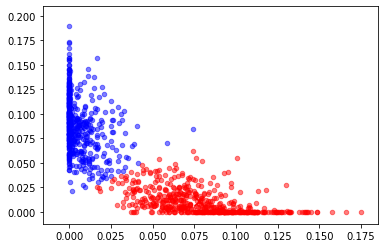

In [37]:
num_clusters = 2
km = KMeans(n_clusters=num_clusters)
km.fit(doc_topic1)
display_cluster(doc_topic1,km,num_clusters)

# Calculate accuracy with new data have label 

In [38]:
df1= pd.read_excel (r'storiestest.xlsx')
df1.drop(['Link'],axis=1 , inplace = True)

In [39]:
df1['Story'] = df1['Story'].apply(preprocess)
df1["Story"] = df1["Story"].apply(lambda x: clean(str(x)))
my_text1=df1["Story"]
tfidf11 = TfidfVectorizer(stop_words=stopwords.words("arabic"))
X1=tfidf11.fit_transform(my_text1)
doc_topic11 = nmf_model.fit_transform(X1)
cluster_labelss=kn.fit_predict(doc_topic11)
df1["cluster"] = cluster_labelss

C:\Users\admin\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['آمين', 'أب', 'أخ', 'أفعل', 'أفعله', 'ؤلاء', 'إل', 'إم', 'ات', 'اتان', 'ارتد', 'ان', 'انفك', 'برح', 'تان', 'تبد', 'تحو', 'تعل', 'حد', 'حم', 'حي', 'خب', 'ذار', 'سيما', 'صه', 'ظل', 'ظن', 'عد', 'قط', 'مر', 'مكان', 'مكانكن', 'نب', 'هات', 'هب', 'واها', 'وراء'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [40]:
df1["cluster"].value_counts()

1    34
0    34
Name: cluster, dtype: int64

In [41]:
df2= pd.read_excel (r'storiestestwithlabels.xlsx')

In [42]:
from sklearn.metrics import accuracy_score
y_pred = df1["cluster"]
y_true = df2["labels"]
accuracy_score(y_true, y_pred)


1.0

# Display of the most frequently repeated words in stories suitable for children

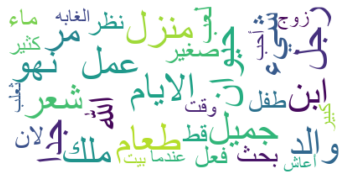

In [43]:
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

txt ='''  صغير  ملك نهو  الله عمل والد رجل حيوان  مر طعام منزل شيء جدا جميل ابن شعر الايام
ثعلب بيت أعاش كبير  عندما الغابه أحب زوج كثير وقت لعب  فعل  قط لان  بحث  طفل نظر  ماء
'''

word_cloud = WordCloud(font_path='arial', stopwords=STOPWORDS, background_color="white", max_font_size=50, max_words=100)
word_cloud = word_cloud.generate_from_text(get_display(arabic_reshaper.reshape(txt)))

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()